<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   지도 학습(Supervised Learning)
    *   분류(Classification)
    *   회귀(Regression)


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# 데이터 준비

Fish market 데이터에서 농어(Perch)의 무게를 농어의 길이로 예측

In [2]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [3]:
fish_df = pd.read_csv(file_path)

In [4]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Perch(농어) 부분집합
perch = fish_df[fish_df['Species'] == 'Perch']

In [6]:
perch.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [7]:
# 관심 변수(종속 변수): 무게
perch_weight = perch['Weight'].values

In [8]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [9]:
# 독립 변수(설명 변수): Length2
perch_length = perch['Length2'].values

In [10]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

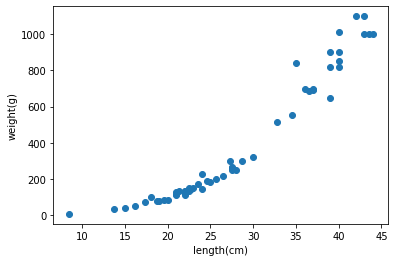

In [13]:
# weight ~ length 산점도 그래프
plt.scatter(perch_length, perch_weight)

plt.xlabel('length(cm)')
plt.ylabel('weight(g)')

plt.show()

In [14]:
perch_weight.shape  #> target - 1차원 배열

(56,)

In [15]:
perch_length.shape
# scikit-learn 패키지에서는 데이터는 2차원 배열이어야 함.

(56,)

In [16]:
X = perch_length[:, np.newaxis]  # 데이터(data): perch_length를 2차원 배열로 변환
y = perch_weight.copy()  # 타겟(target): perch_weight를 복사

In [17]:
X.shape

(56, 1)

In [19]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])



---



In [23]:
perch_length.reshape((56, 1))

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [25]:
perch_length.reshape((-1, 1))

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])



---



# Train/Test Split

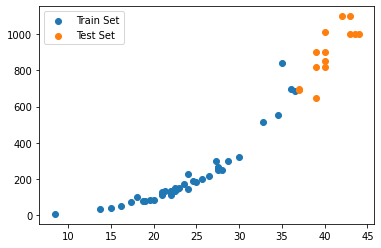

In [29]:
# 순차적 샘플링
X_train, X_test = X[:42], X[42:]
y_train, y_test = y[:42], y[42:]

plt.scatter(X_train, y_train, label='Train Set')
plt.scatter(X_test, y_test, label='Test Set')
plt.legend()
plt.show()

샘플이 무작위로 섞여 있지 않고 length 순서로 정렬되어 있기 때문에, 훈련/테스트 셋을 나눌 때 순서대로 나누는 것은 좋은 방법이 아님!

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [31]:
X_train.shape, y_train.shape

((42, 1), (42,))

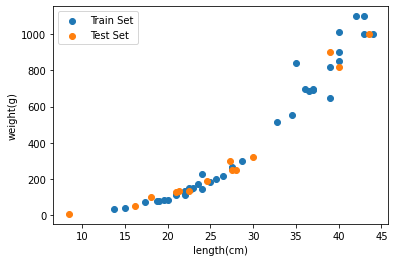

In [32]:
plt.scatter(X_train, y_train, label='Train Set')
plt.scatter(X_test, y_test, label='Test Set')

plt.legend()
plt.xlabel('length(cm)')
plt.ylabel('weight(g)')

plt.show()

# kNN(k-Nearest Neighbors) Regressor 학습/평가

In [33]:
knn_reg = KNeighborsRegressor()  # 모델 생성

In [36]:
knn_reg.fit(X_train, y_train)  # 훈련 셋으로 모델 학습

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [37]:
# 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [38]:
# 훈련 셋의 타겟(실제값)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [39]:
knn_reg.score(X_train, y_train)
#> R^2 score(coefficient of determinant, 결정계수)

0.9698823289099255